In [1]:
# General modules
import sys
import os
import session_info
import warnings
from pyprojroot.here import here
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Import custom functions
sys.path.insert(1, str(here('bin')))
from customPythonFunctions import get_HVG

# Specific modules
import scanpy as sc
import anndata as ad
from upsetplot import from_contents, UpSet 
import scienceplots

# Setting some parameters
warnings.filterwarnings("ignore")

plt.style.use(['nature'])
dpi_fig_save = 300
sc.set_figure_params(dpi=100, dpi_save=dpi_fig_save, vector_friendly=True)

overwriteFigures = True
overwriteData = True

print("Main directory path: {}".format(here()))

Main directory path: /scratch_isilon/groups/singlecell/shared/projects/Inflammation-PBMCs-Atlas-R1


**Load data**

In [2]:
# Load the h5ad file
infile_path = here("01_data_processing/SCGT00_CentralizedDataset/results/SCGT00_MAIN_afterQC.h5ad")
adata = sc.read_h5ad(infile_path)
adata

AnnData object with n_obs × n_vars = 855417 × 37169
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'technology', 'patientID', 'disease', 'timepoint_replicate', 'treatmentStatus', 'therapyResponse', 'sex', 'age', 'BMI', 'binned_age', 'diseaseStatus', 'smokingStatus', 'ethnicity', 'institute', 'diseaseGroup', 'batches', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_plt', 'log1p_total_counts_plt', 'pct_counts_plt'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status', 'mt', 'ribo', 'hb', 'plt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'disease_colors'

In [3]:
adata.obs.head()

,studyID,libraryID,sampleID,chemistry,technology,patientID,disease,timepoint_replicate,treatmentStatus,therapyResponse,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,total_counts_plt,log1p_total_counts_plt,pct_counts_plt
cellID,,,,,,,,,,,,,,,,,,,,,
SCGT00_L051_I57.3P_T0_AAACCCAAGGTGAGAA,SCGT00,SCGT00_L051,SCGT00_I57.3P_T0,3_GEX_V3,3_GEX_V3_GenoHashed,SCGT00_I57,RA,0.0,ongoing,NR,...,4.249292,223,5.411646,31.586402,0,0.000000,0.000000,0,0.000000,0.000000
SCGT00_L051_I56.3P_T0_AAACCCAAGTCCGTCG,SCGT00,SCGT00_L051,SCGT00_I56.3P_T0,3_GEX_V3,3_GEX_V3_GenoHashed,SCGT00_I56,RA,0.0,ongoing,R,...,3.811777,1654,7.411556,43.480547,0,0.000000,0.000000,1,0.693147,0.026288
SCGT00_L051_I53.3P_T0_AAACCCAAGTGCACTT,SCGT00,SCGT00_L051,SCGT00_I53.3P_T0,3_GEX_V3,3_GEX_V3_GenoHashed,SCGT00_I53,RA,0.0,ongoing,R,...,3.912204,1945,7.573531,19.764252,3,1.386294,0.030485,11,2.484907,0.111777
SCGT00_L051_I52.3P_T0_AAACCCACAACTGTGT,SCGT00,SCGT00_L051,SCGT00_I52.3P_T0,3_GEX_V3,3_GEX_V3_GenoHashed,SCGT00_I52,RA,0.0,ongoing,NR,...,14.909091,37,3.637586,3.363636,0,0.000000,0.000000,0,0.000000,0.000000
SCGT00_L051_I56.3P_T0_AAACCCACAAGAATGT,SCGT00,SCGT00_L051,SCGT00_I56.3P_T0,3_GEX_V3,3_GEX_V3_GenoHashed,SCGT00_I56,RA,0.0,ongoing,R,...,4.618376,2296,7.739359,55.809431,0,0.000000,0.000000,1,0.693147,0.024307


# Normalization: shifted logarithm

Following best practices: https://www.sc-best-practices.org/preprocessing_visualization/normalization.html

Luecken, M. D., & Theis, F. J. (2019). Current best practices in single‐cell RNA‐seq analysis: a tutorial. Molecular systems biology, 15(6), e8746

Here, we aim to log normalize data, it means, to normalize each cell counts by the total counts over all genes, so that every cell ends up having the same total count. This is then multiplied by a factor, in this case, of 10e4.

We store the 'raw' counts into the `adata.layers["counts"]`. The `Log1p * 10e4` normalized expression is stored at `adata.layers["log1p_10e4_counts"]`.
Most important, the `adata.X` is updated with the normalized data. 

In [4]:
# Keeping 'raw' counts
adata.layers["counts"] = adata.X.copy()

# Normalization, replace adata.X and storing
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers["log1p_10e4_counts"] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 855417 × 37169
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'technology', 'patientID', 'disease', 'timepoint_replicate', 'treatmentStatus', 'therapyResponse', 'sex', 'age', 'BMI', 'binned_age', 'diseaseStatus', 'smokingStatus', 'ethnicity', 'institute', 'diseaseGroup', 'batches', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_plt', 'log1p_total_counts_plt', 'pct_counts_plt'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status', 'mt', 'ribo', 'hb', 'plt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'disease_colors', 'log1p'
    layers: 'counts', 'log1p_10e4_counts'

We can now inspect how the distribution of our counts changed after we applied the shilfted logarithm `(Log1p * 10e4)` and compare it to the total count from our raw count dataset.

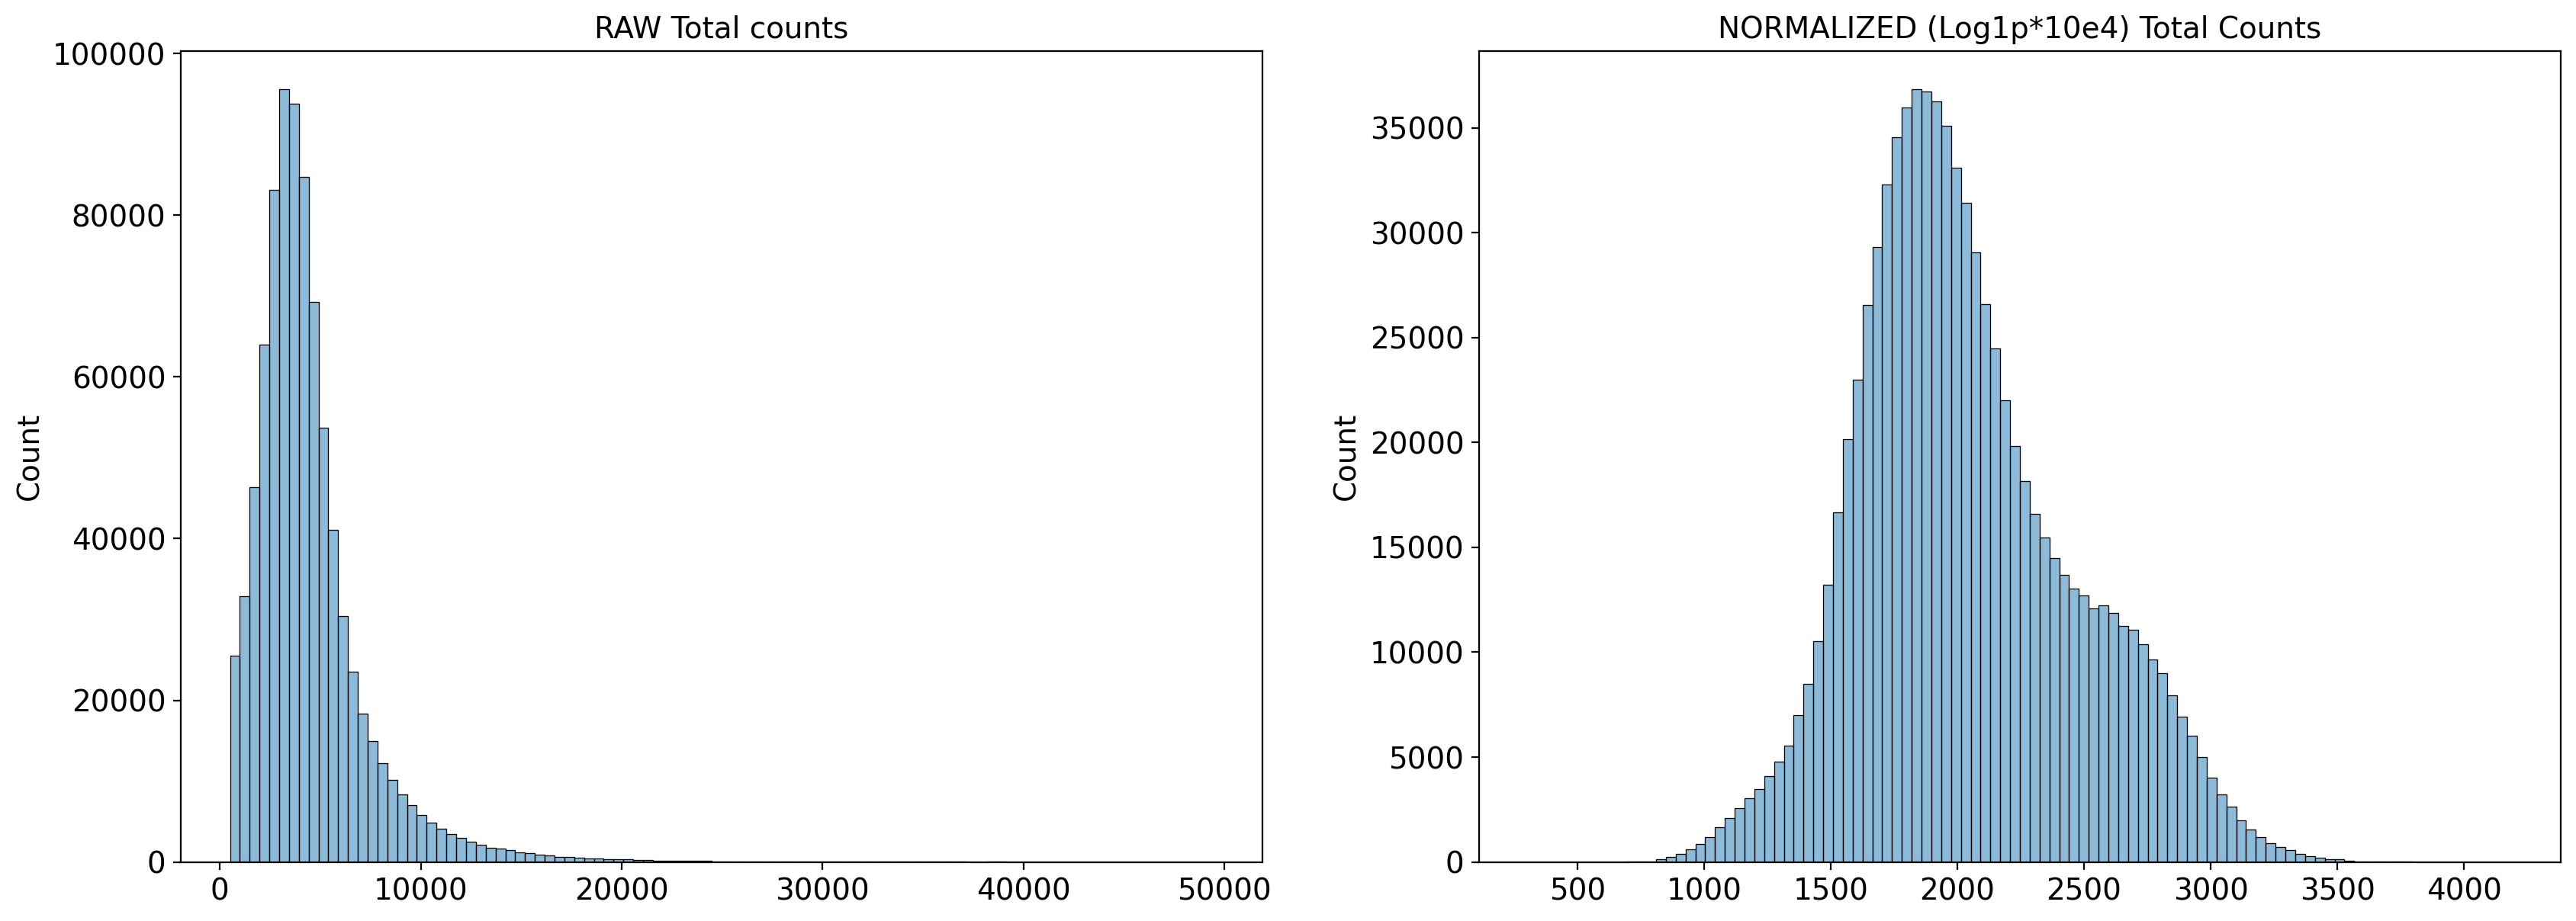

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

p1 = sns.histplot(adata.layers["counts"].sum(1), bins=100, kde=False, ax=axes[0], legend=False)
axes[0].set_title("RAW Total counts")
axes[0].grid(False)

p2 = sns.histplot(adata.layers["log1p_10e4_counts"].sum(1), bins=100, kde=False, ax=axes[1], legend=False)
axes[1].set_title("NORMALIZED (Log1p*10e4) Total Counts")
axes[1].grid(False)

if overwriteFigures:
    plt.savefig(here('01_data_processing/SCGT00_CentralizedDataset/figures/2_RAWvsNORMALIZEDcounts.pdf'), bbox_inches='tight', pad_inches=0, dpi=dpi_fig_save)
plt.show()

# Cell cycle score

For computing the cell cycle score, we used the list of genes provided by Seurat.

In particular, the two lists (i.e., S and G2M) were obtained by saving as csv the genes included in *cc.genes.updated.2019* from Seurat 4.3.0.1

In [6]:
# Read the gene lists
ccGL = pd.read_csv(here('external_reference_data/S_G2M_seurat_geneList.csv'), sep='\t')
ccGL = ccGL.to_dict(orient='list')
ccGL['S'] = [g for g in ccGL['S'] if g is not np.nan]
ccGL['G2M'] = [g for g in ccGL['G2M'] if g is not np.nan]

# Convert cell cycle gene_symbol into gene_ensemblID dictionary
def replace_gene_names_with_ids(gene_names, df):
    gene_ids = []
    for gene_name in gene_names:
        # Check if gene_name exists in the DataFrame
        if gene_name in df['symbol'].values:
            # Get the Ensembl ID corresponding to the gene name
            gene_id = df[df['symbol'] == gene_name].index[0]
            gene_ids.append(gene_id)
        else:
            continue
    return gene_ids


ccGL_ensemblIDs = {}
for key, gene_names in ccGL.items():
    gene_ids = replace_gene_names_with_ids(gene_names, adata.var)
    ccGL_ensemblIDs[key] = gene_ids
ccGL_ensemblIDs

{'S': ['ENSG00000100297',
  'ENSG00000132646',
  'ENSG00000176890',
  'ENSG00000168496',
  'ENSG00000166508',
  'ENSG00000104738',
  'ENSG00000167325',
  'ENSG00000076248',
  'ENSG00000131153',
  'ENSG00000076003',
  'ENSG00000144354',
  'ENSG00000143476',
  'ENSG00000198056',
  'ENSG00000276043',
  'ENSG00000151725',
  'ENSG00000119969',
  'ENSG00000049541',
  'ENSG00000125630',
  'ENSG00000132780',
  'ENSG00000111247',
  'ENSG00000112312',
  'ENSG00000092470',
  'ENSG00000163950',
  'ENSG00000175305',
  'ENSG00000012963',
  'ENSG00000077514',
  'ENSG00000095002',
  'ENSG00000156802',
  'ENSG00000051180',
  'ENSG00000171848',
  'ENSG00000093009',
  'ENSG00000094804',
  'ENSG00000174371',
  'ENSG00000075131',
  'ENSG00000136982',
  'ENSG00000197299',
  'ENSG00000118412',
  'ENSG00000162607',
  'ENSG00000092853',
  'ENSG00000101868',
  'ENSG00000159259',
  'ENSG00000171421',
  'ENSG00000129173'],
 'G2M': ['ENSG00000164104',
  'ENSG00000170312',
  'ENSG00000137804',
  'ENSG00000175063',


In [7]:
sc.tl.score_genes_cell_cycle(adata, s_genes=ccGL_ensemblIDs['S'], g2m_genes=ccGL_ensemblIDs['G2M'], use_raw=False)

In [8]:
adata_cc_genes = adata[:, ccGL_ensemblIDs['S'] + ccGL_ensemblIDs['G2M']]
adata_cc_genes

View of AnnData object with n_obs × n_vars = 855417 × 97
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'technology', 'patientID', 'disease', 'timepoint_replicate', 'treatmentStatus', 'therapyResponse', 'sex', 'age', 'BMI', 'binned_age', 'diseaseStatus', 'smokingStatus', 'ethnicity', 'institute', 'diseaseGroup', 'batches', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_plt', 'log1p_total_counts_plt', 'pct_counts_plt', 'S_score', 'G2M_score', 'phase'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status', 'mt', 'ribo', 'hb', 'plt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'disease_colors', 'log1p'
    layers: 'counts', 

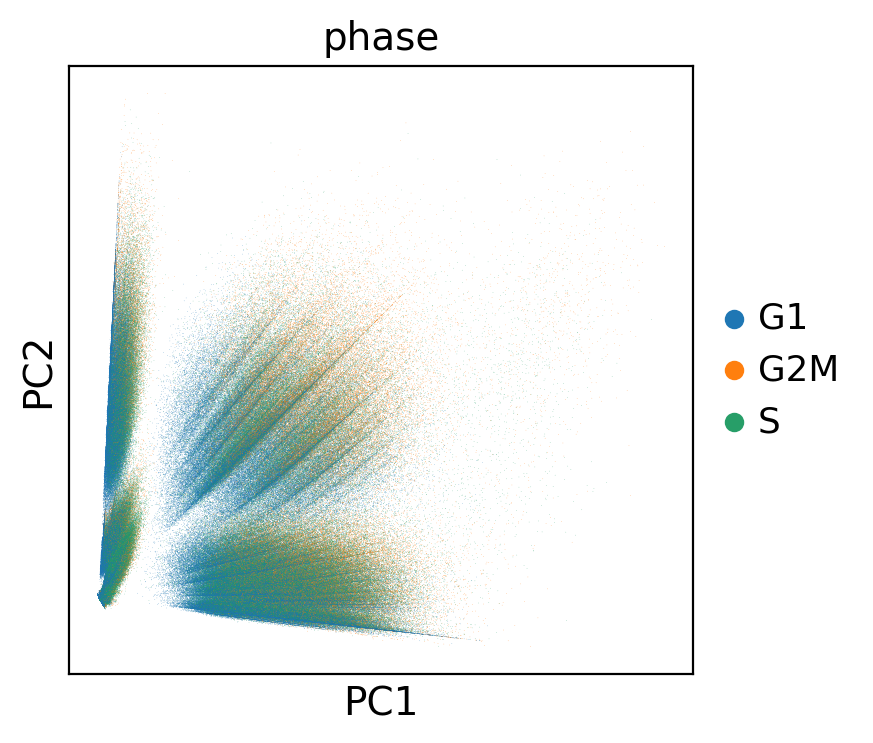

In [9]:
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase', return_fig=False)

# Feature selection

Following best practices:
https://www.sc-best-practices.org/preprocessing_visualization/feature_selection.html


When working with multiple datasets could be present a potential batch-effect due to the fact that each dataset has been generated by different laboratories, times, technicians, and also sequenced in different facilities. Therefore, a crucial step before looking into the data is to perform an accurate integration step.

For integration, in these particular case, we will use scVI and scANVI algorithms, which have shown to lead very good results correcting batch-effects while preserving biological differences, and outperform other available methods in multiple benchmarking articles. Whereas scVI treats the data as unlabelled, scANVI needs datasets to be fully labelled (cell type annotation), but it better preserves biology.

Before data integration, it is requiered to run a feature selection (highly variable genes, HVG) step considering the requirements for the following integration step. Considering scVI and scANVI requirements, both accomodate using all genes in terms of runtime, but we aim to generate a subset of genes in order to capture and preserve disease-specific (sometimes project-specific) gene expression.

For HVG selection we implemented a similar strategy that he one used in the Human Lung Cell Atlas [(Sikkema et al., Nature Medice, 2023)](https://www.nature.com/articles/s41591-023-02327-2). In particular, we define HVG for each study indipendently using the following parameters (default parameter settings: min_disp=0.5, min_mean=0.0125, max_mean=3, span=0.3, n_bins=20), then we build our final list of top HVGs by starting from the ones HV in all datasets, then genes that are HV in all datasets except 1, then except 2 and so on, until we select 3000 genes.

Here, `adata.X` contains `Log1p * 10e4` normalized expression.

**Excluding specific genes from HVG selection**

We have reasoned that T- and B- cell receptors genes, including VDJ joining and variable regions, are not useful to describe cell identities but rather to capture (generally) patient specific cell populations that are suffering clonal expansion within a specific pathological / inflammatory condition. Thus, we decided to exclude TCR and BCR genes as well as genes related with the Major Histocompatibility Complex (MHC) from the list of HVG selection that we will use to perform data integration. Additionally, we also decided to drop genes related to the mitochondrial and ribosomal organules since these might be largely biased due to different technical effects.

Although we are not really interested in studying neither to genes exclusive from to Red Blood Cells (such as hemoglobin) or Platelets (such as PPBP), we will keep them in order to be able to identify specific cell subsets we are not interested in (RBC or Platelets) and to better delineate the inflammation cell identity profile, such as these ones being very transcriptionally active. Then, once RBC and Platelets removed from our dataset, we will also exclude them.

In [10]:
# Retrieve MT and RB genes present in the dataset
MT_gene_idx = adata.var["symbol"].str.startswith("MT-")
print(f"{np.sum(MT_gene_idx)} mitochondrial genes")

RB_gene_idx = adata.var["symbol"].str.startswith(("RPS", "RPL"))
print(f"{np.sum(RB_gene_idx)} ribosomal genes")

# Retrieve TCR and BCR present in the dataset
TCR_gene_idx = adata.var["symbol"].str.contains("^TRA(J|V)|^TRB(J|V|D)")
print(f"{np.sum(TCR_gene_idx)} TCR genes")

BCR_gene_idx = adata.var["symbol"].str.contains("^IGH(J|V)") # BCR_gene_idx = genes["symbol"].str.contains("^IGH(J|V)|^IGK(J|V)|^IGL(J|V)")
print(f"{np.sum(BCR_gene_idx)} BCR genes")

MHC_gene_idx = adata.var["symbol"].str.contains("^HLA-")
print(f"{np.sum(MHC_gene_idx)} MHC genes")

# ### TO MODIFY & RUN FROM STEP 2 (when RBC and Platelets will be filtered out)
# HB_gene_idx = adata.var["symbol"].str.contains("^HB[^(P)]")
# print(f"{np.sum(MHC_gene_idx)} HB genes")

# PLT_gene_idx = adata.var["symbol"].isin(["PPBP", "PDGF", "ANG1", "LAPTM4B", "WASF3", "TPM3", "PF4", "TAC1"])
# print(f"{np.sum(MHC_gene_idx)} PLT genes")

exclude_gene_idx = (MT_gene_idx | RB_gene_idx | TCR_gene_idx | BCR_gene_idx | MHC_gene_idx)

adata_forHVG = adata[:, ~exclude_gene_idx]
adata_forHVG

13 mitochondrial genes
113 ribosomal genes
198 TCR genes
159 BCR genes
21 MHC genes


View of AnnData object with n_obs × n_vars = 855417 × 36665
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'technology', 'patientID', 'disease', 'timepoint_replicate', 'treatmentStatus', 'therapyResponse', 'sex', 'age', 'BMI', 'binned_age', 'diseaseStatus', 'smokingStatus', 'ethnicity', 'institute', 'diseaseGroup', 'batches', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_plt', 'log1p_total_counts_plt', 'pct_counts_plt', 'S_score', 'G2M_score', 'phase'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status', 'mt', 'ribo', 'hb', 'plt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'disease_colors', 'log1p'
    layers: 'counts

## Exploratory analysis of HVG

In [11]:
sc.pp.highly_variable_genes(adata_forHVG, 
                            layer='log1p_10e4_counts', 
                            batch_key='libraryID', 
                            n_top_genes=None, 
                            min_disp=0.4, 
                            min_mean=0.015, 
                            max_mean=4, 
                            span=0.3, 
                            n_bins=20, 
                            flavor='seurat', 
                            inplace=True, 
                            check_values=True)
adata_forHVG.var.highly_variable.sum()

3126

In [12]:
print(f'The total number of selected HVG is {adata_forHVG.var.highly_variable.sum()}')

The total number of selected HVG is 3126


In [13]:
adata_HVG = adata_forHVG[:, adata_forHVG.var.highly_variable]
adata_HVG

View of AnnData object with n_obs × n_vars = 855417 × 3126
    obs: 'studyID', 'libraryID', 'sampleID', 'chemistry', 'technology', 'patientID', 'disease', 'timepoint_replicate', 'treatmentStatus', 'therapyResponse', 'sex', 'age', 'BMI', 'binned_age', 'diseaseStatus', 'smokingStatus', 'ethnicity', 'institute', 'diseaseGroup', 'batches', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_plt', 'log1p_total_counts_plt', 'pct_counts_plt', 'S_score', 'G2M_score', 'phase'
    var: 'hgnc_id', 'symbol', 'locus_group', 'HUGO_status', 'mt', 'ribo', 'hb', 'plt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersion

# Save results

In [14]:
# Save Anndata object (.h5ad file) 
if overwriteData:
    adata.write(here("01_data_processing/SCGT00_CentralizedDataset/results/SCGT00_MAIN_normalized.h5ad"), compression="gzip")

In [15]:
# Save the object subset to keep on HVGs that will be used in 04, 05, and 06 notebooks
if overwriteData:
    adata_HVG.write(here("01_data_processing/SCGT00_CentralizedDataset/results/SCGT00_MAIN_normalized_HVGsubset.h5ad"), compression="gzip")

In [16]:
session_info.show()